# (Proposer Loan Data)
## by (Sarah Alhomoud)

## INTRDUCTION

> This financial data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Current loan status, borrower income, and many others. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers

This data dictionary "https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0" explains the variables in the data set.
You are not expected to explore all of the variables in the
dataset! Focus your exploration on about 10-15 of them.

In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [56]:
df=pd.read_csv('prosperLoanData.csv')
df.head(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158


In [57]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [58]:
df.shape

(113937, 81)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [60]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [61]:
#Drop columns that is empty or not needed in the analysis 
df.drop(['ListingKey', 'ListingNumber', 'ClosedDate', 'CurrentlyInGroup',
         'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',  'LoanKey', 'TotalProsperLoans', 'CreditGrade','LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
        'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber']
        ,axis=1, inplace = True)

        
df.drop(['ProsperPrincipalBorrowed',  'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
       'LP_CollectionFees', 'LP_GrossPrincipalLoss','ProsperPrincipalOutstanding', 
         'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments',
         'LP_InterestandFees', 'LP_ServiceFees'],
        axis=1, inplace = True)

In [62]:
df.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRang


> ## Univariate Exploration
In this section I will anlyze and create visualization of one variable.

### What are the 10 top number of listing in each Borrower States ?

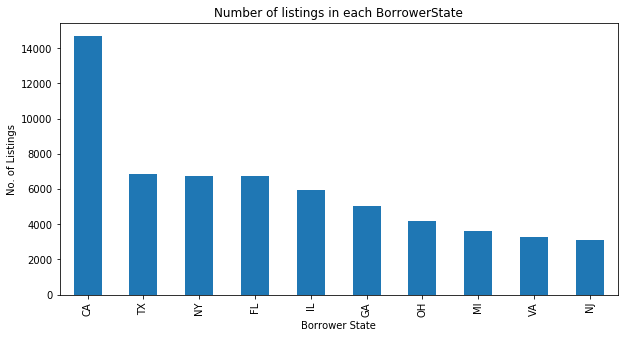

In [63]:
# find the top 10 states borrower
top10_states_borrower=df.BorrowerState.value_counts().head(10)

#create the bar chart
top10_states_borrower.plot.bar(stacked = True , figsize=(10, 5),title='Number of listings in each BorrowerState', grid=False)
                                
plt.xlabel('Borrower State');
plt.ylabel('No. of Listings');


As we can notice CA takes the first place in the borrower states by more than 14,000 listing, then TX , NY almost in the same positions , which match what mentioned about the population rank in the US.

### What is the number of listing under each Loan Status?

In [64]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

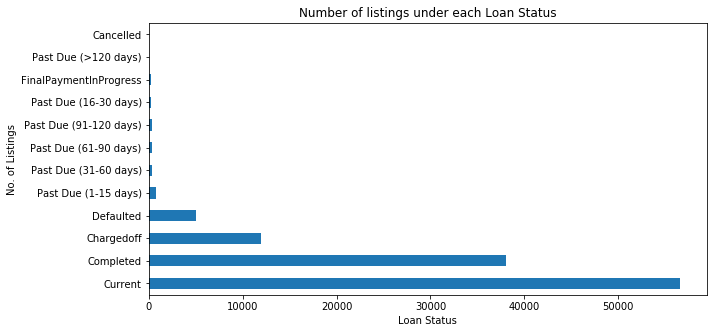

In [65]:
Loan_status=df.LoanStatus.value_counts()

#create the bar chart
Loan_status.plot.barh(stacked = True , figsize=(10, 5),#ordered = True, categories = order_loan,
                      title='Number of listings under each Loan Status', grid=False)
                                
plt.xlabel('Loan Status');
plt.ylabel('No. of Listings');

    The current loan staus has the highest number of listings over than 50k, then the completed and chargedoff..etc.
    Some status are in small or no amount ,so it will be dismiss.

### What is the most type of profession takes loans ?

Text(0.5, 1.0, 'Type of the Top5 professin takse loan')

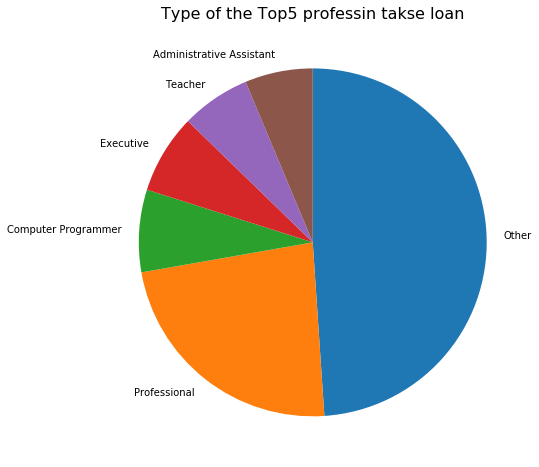

In [66]:
sorted_Occupation = df['Occupation'].value_counts().head(6)

plt.figure(1, figsize=(17,8))
plt.pie(sorted_Occupation, labels = sorted_Occupation.index ,counterclock = False, startangle = 90)

plt.title('Type of the Top5 professin takse loan',fontsize=16)

Professionals are in the top of professin list who have loans 
, then computer programmer , executive and teatchers.

### What is the income range of the borrowers ?

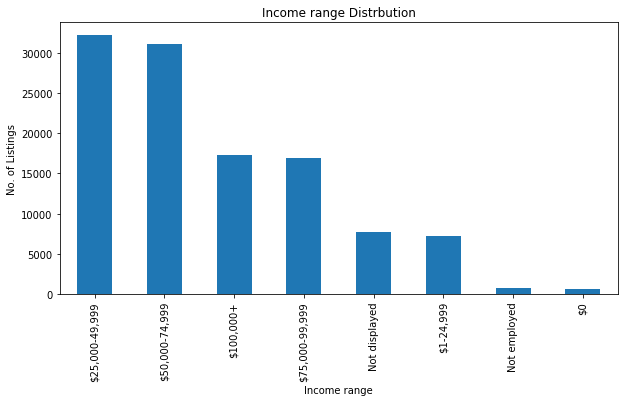

In [67]:
income = df.IncomeRange.value_counts()

#create the bar chart
income.plot.bar(stacked = True , figsize=(10, 5),title='Income range Distrbution', grid= False)
                                
plt.xlabel('Income range'); 
plt.ylabel('No. of Listings');


As we can see most of the borrower income range fall between 25k-49k , and the second place comes the income between 50k-75k..etc. As the range of income increase we can notice that the number of listing decrease.

### What Prosper Score that the borrowers received most ?

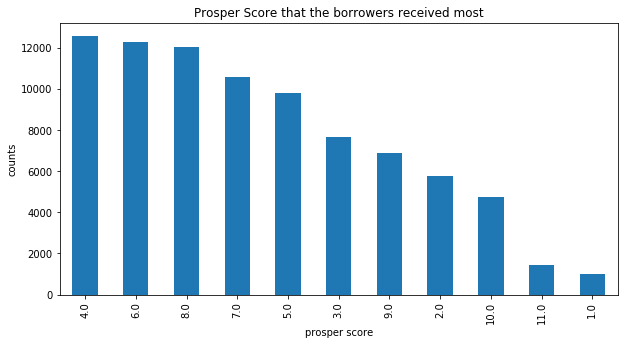

In [68]:
prosper_score = df.ProsperScore.value_counts()

prosper_score.plot.bar(stacked = True , figsize=(10, 5),title='Prosper Score that the borrowers received most', grid= False)
                   
plt.xlabel('prosper score');
plt.ylabel('counts');

The above chart shows that most borrower has low prosper Score. Where the scores with high values has small number of borrower.

### Why people take loan ? the categories of the loans?

In [69]:

df.rename(columns = {'ListingCategory (numeric)': 'listing_category'}, inplace= True)
df.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'listing_category',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'Inco

In [70]:
df['listing_category']= (df['listing_category']).astype('str')

In [71]:
#The category of the listing that the borrower selected when posting their listing: 
df['listing_category'].replace({'0': 'Not Available','1': 'Debt Consolidation', '2' : 'Home Improvement',
                                '3' : 'Business', '4' : 'Personal Loan', '5' : 'Student Use',
                                '6' : 'Auto', '7': 'Other', '8' : 'Baby&Adoption', '9' :'Boat', 
                                '10' : 'Cosmetic Procedure', '11' : 'Engagement Ring', 
                                '12' : 'Green Loans', '13' : 'Household Expenses', 
                                '14' : 'Large Purchases', '15' : 'Medical/Dental', 
                                '16' : 'Motorcycle', '17' : 'RV', '18' : 'Taxes', 
                                 '19' : 'Vacation', '20' : 'Wedding Loans'}, inplace=True)
df.listing_category.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

In [72]:
loan_category= df['listing_category'].value_counts().head(10)
loan_category

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Name: listing_category, dtype: int64

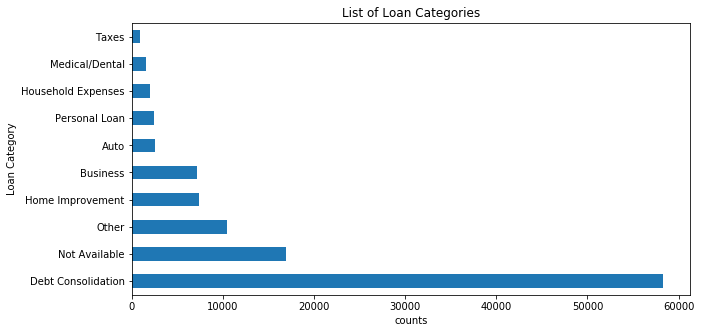

In [73]:
loan_category.plot.barh(stacked = True , figsize=(10, 5),title='List of Loan Categories', grid= False)
                   
plt.xlabel('counts');
plt.ylabel('Loan Category');

Most of the loans has been taken beacuse of Debt Consolidation , 

(we will skip not available and other ) then it comes the Home improvement and busineses , auto..etc.

## Bivariate Exploration

> In this section, I will investigate the relationships between pairs of variables in the
data set. 

### Is their relationship between the borrower Annual Percentage Rates (APRs) and the Prosper Score?

Text(0, 0.5, 'Borrowers_APR')

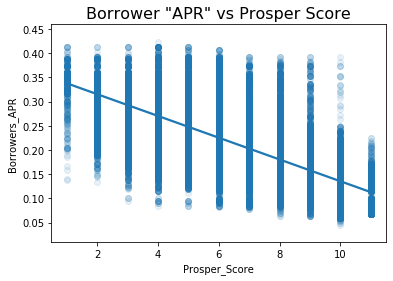

In [74]:
# Create regplot to show the correlation

sb.regplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR', scatter_kws = {'alpha': 0.1})

plt.title('Borrower "APR" vs Prosper Score', fontsize=16);
plt.xlabel('Prosper_Score')
plt.ylabel('Borrowers_APR')

We can see that there is high APR for each prosper score, and from the above chart we can say there is
  a moderete-negative relationship between the Borrower APRs and  Prosper Score

### What is the Borrower APR for each listing category ?

In [75]:
apr_mean = df['BorrowerAPR'].mean()

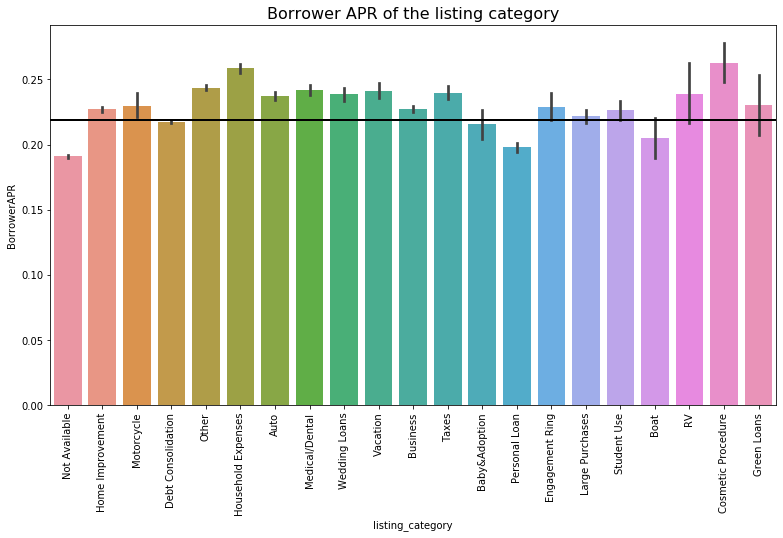

In [76]:
plt.figure(figsize = (13, 7))
sb.barplot(data = df, x = 'listing_category', y = 'BorrowerAPR')

plt.title('Borrower APR of the listing category' , fontsize=16)
plt.axhline(y = apr_mean, linewidth = 2,color = 'black')
plt.xticks(rotation = 90);

Household Expense and cosmetic procedure recived highes Borrower APR over 0.25, where the average borrower APR goes to Debt Consolidation and large purchases. And Personal loan has the lowest borrower APR

### What is the prosper score of each loan status ?

In [77]:
score_mean = df['ProsperScore'].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

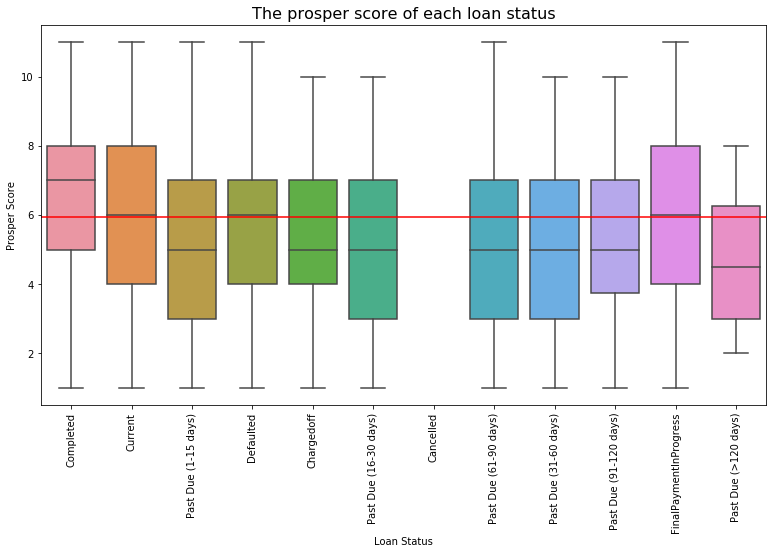

In [78]:
# Create boxblot to show the relationship
plt.figure(figsize = (13, 7))
sb.boxplot(data = df, x = 'LoanStatus', y = 'ProsperScore', )

plt.title('The prosper score of each loan status', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Prosper Score')

plt.axhline(y = score_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)

Average prosper score is 6 , Most of the loan status get a Prosper Score of 5 or below. The completed loans gets the highest Prosper score.

### Are the borrowers home owners? Home Ownership vs loan status category.

In [79]:
# Classified homeownership based on loan status ctegories
homeowner_loan = df.groupby(['LoanStatus', 'IsBorrowerHomeowner'])['LoanStatus'].count().unstack('IsBorrowerHomeowner')
homeowner_loan.apply(lambda row: row / row.sum(), axis = 1)

IsBorrowerHomeowner,False,True
LoanStatus,,
Cancelled,0.600000,0.400000
Chargedoff,0.555454,0.444546
Completed,0.519882,0.480118
Current,0.461291,0.538709
Defaulted,0.546831,0.453169
FinalPaymentInProgress,0.463415,0.536585
Past Due (1-15 days),0.532258,0.467742
Past Due (16-30 days),0.516981,0.483019
Past Due (31-60 days),0.493113,0.506887


Text(0.5, 0, 'homeowner')

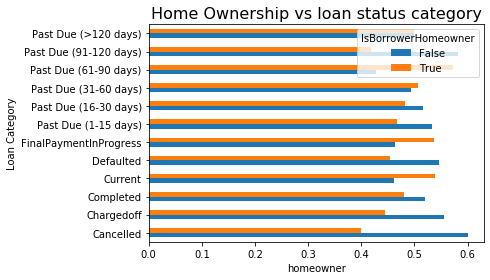

In [80]:
#Create bar chart to show the percentage

homeowner_loan.apply(lambda row: row / row.sum(), axis = 1).plot(kind='barh')

plt.title('Home Ownership vs loan status category',fontsize=16)
plt.ylabel("Loan Category")
plt.xlabel("homeowner")

In [81]:
# Create a copy of the dataset that include only the completed loans,so we can
#count the homeowner who have loan.
df2= df.copy()
df2.head(2)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,...,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,...,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,1.0,0,0,0.0,1


In [82]:
df2 =df2[df2['LoanStatus']!='Current']
df2["LoanStatus"]=(df2['LoanStatus']=='Completed').astype(int)

Text(0.5, 1.0, 'Is the borrowers home owners?')

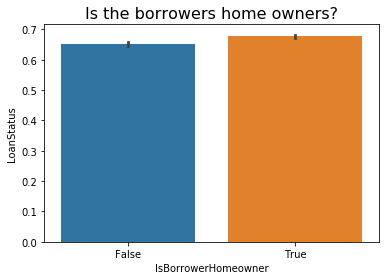

In [83]:
#create bar plot to see the result
sb.barplot(data= df2 ,x='IsBorrowerHomeowner', y='LoanStatus' )
plt.title('Is the borrowers home owners?' , fontsize=16)

Most of the borrower ara homeowner , eventhough the diffrence between home\non-home owner are small percentage.

### What is the Employment Status of the borrower ?

Text(0.5, 1.0, 'Employment Status of the borrower')

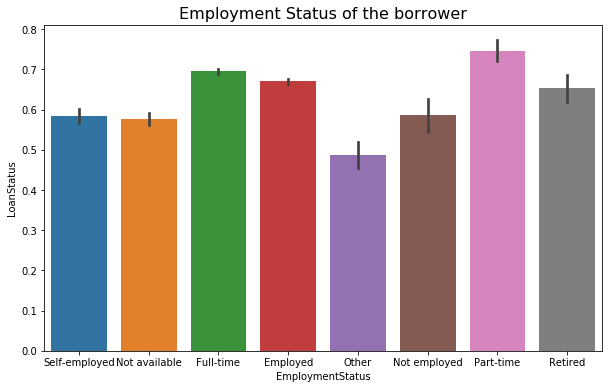

In [84]:
plt.figure(figsize=(10, 6))

sb.barplot(data=df2 ,x="EmploymentStatus", y="LoanStatus")
plt.title('Employment Status of the borrower' , fontsize=16)

Part-time worker are the most people taken loan more than full time worker which is intresting ! self-employed and not employed are having alomst the same percentage.

### Waht is the effect of borrower rate over the years? Is their any major diffrences in the pattern over the years?

In [88]:
# creat year column bt extracting the year from ListingCreationDate
df['Year'] = df['ListingCreationDate'].str.split('-').str[0]

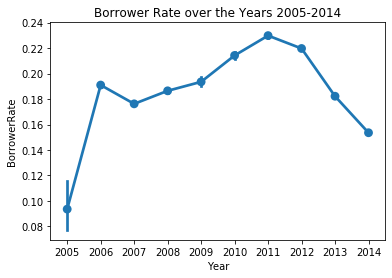

In [89]:
#Create pointplot hart to show the pattern

sb.pointplot(data=df, x='Year', y='BorrowerRate').set_title('Borrower Rate over the Years 2005-2014');


    From 2005-2006 there is a high jump in the borrower rate by almost 0.10 , then it decrease by small amount in 2007.
        From 2007-2011 the rate keep increase with slight difrences then starts to drops till 2014.

## Multivariate Exploration

> In this section , I will Create plots of three or more variables to investigate the data even
further.

### How the borrower rate has effect the borrower homeowner over the years ?

Text(0.5, 1.0, 'The effect of borrower rate on the homeownership over the years')

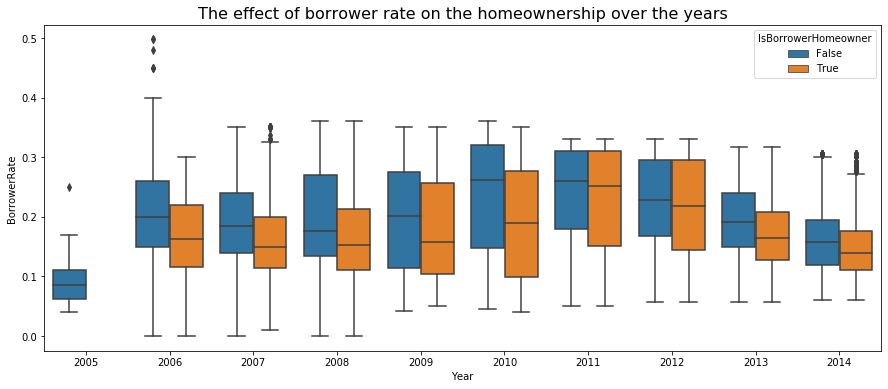

In [90]:
plt.figure(figsize=(15, 6))

sb.boxplot(data=df, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner');
plt.title('The effect of borrower rate on the homeownership over the years', fontsize=16)

The Borrower's interest rate for homeowner , we can say there is a slight diffrence from 2006-2009. after that it starts raising till 2011 and it starts falling to 2014.
 For people with no home ownership , we can notice that there is increses and decreses in the intrest rate between 2006-2010 after that it starts decreses.

### The effect of borrower rate & Prosper Score on the Monthly Income

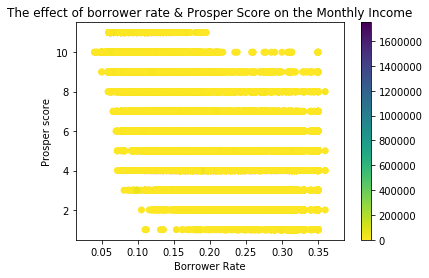

In [111]:
plt.scatter( x = 'BorrowerRate', y = 'ProsperScore', c = 'StatedMonthlyIncome'
           ,data = df, cmap ='viridis_r')

plt.title('The effect of borrower rate & Prosper Score on the Monthly Income')
plt.xlabel('Borrower Rate')
plt.ylabel('Prosper score')
plt.colorbar()

Higher prosper score (10and above) gets low borrower rate such as in 160k income.On the other hand, low scores gets high borrower rate and that the case for income with =<140k.

### Borrwer Income range in respect to Loan Amount vs Term 

Text(0.5, 1.0, 'Comparison b\\w Loan Amount - Income range link to the Terms')

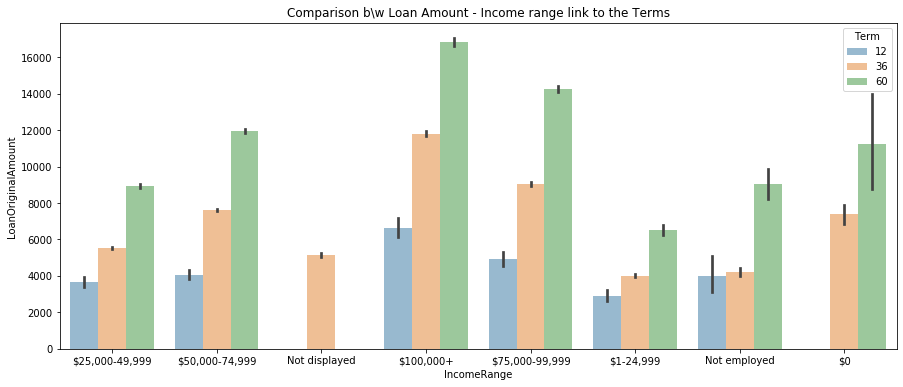

In [91]:
plt.figure(figsize=(15, 6))
sb.barplot(data = df , y = 'LoanOriginalAmount', x = 'IncomeRange', hue = "Term",alpha = 0.5)
plt.title('Comparison b\w Loan Amount - Income range link to the Terms')

 Borrower with income + 100k are taken high amount of loans with laregest term 60 months. In general , 60 moths \ 5 years term is the most one taken in each Borrwer Income. 